### Домашнее задание "Продвинутая линейная алгебра".
Уровень 0:
Придумайте матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найдите собственные значения и собственные вектора матриц:

m = np.array([[2, 2],
              [1, 3]])
print(m)

In [1]:
#a) Диагональная, ортогональная, но не единичная(!) - Пример матрица поворота
import numpy as np
from math import cos, sin, pi
tetha = 130 * 180 / pi
A = np.array([[cos(tetha), sin(tetha)],
             [-sin(tetha), cos(tetha)]])
A

array([[-0.9651331 ,  0.26175964],
       [-0.26175964, -0.9651331 ]])

In [2]:
#Проверка на ортогональность
np.dot(A,A.T) 

array([[ 1.00000000e+00, -4.82594732e-19],
       [-4.82594732e-19,  1.00000000e+00]])

In [3]:
#b) Верхнетреугольная, ортогональная
B = np.eye(3)
np.dot(B,B.T)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [4]:
#c) Нижнетреугольная, ортогональная
C = np.eye(3)
np.dot(C,C.T)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [5]:
#d) Матрица, у которой определитель = 1, и все элементы не равны 0
D = np.array([[3,1],[2,1]])
#Проверим
np.linalg.det(D)

1.0000000000000002

In [6]:
# Найдите собственные значения и собственные вектора матриц:
m = np.array([[2, 2], [1, 3]])
print(m)
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

[[2 2]
 [1 3]]
Собственное значение 1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
Собственное значение 4.0
соответствующий ему собственный вектор [-0.70710678 -0.70710678]


### Уровень 1:
Найдите спектральное разложение матрицы:

m = np.array([[1, 2],
              [2,3]])
print(m)
Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия предлагаю использовать MSE.*

In [7]:
#Найдите спектральное разложение матрицы: - матрица квадратная - оно возможно
m = np.array([[1, 2], [2,3]])

w, v = np.linalg.eig(m)
D_sp = np.diag(w) #Диагональная матрица из собственных чисел исходной матрицы
S_sp = v.T
print(S_sp.T, D_sp, S_sp, sep = '\n\n')

[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

[[-0.23606798  0.        ]
 [ 0.          4.23606798]]

[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]


In [8]:
#Убедимся, что это действительно спектральное разложение - и перемножим матрицы S_sp*D_sp*S_sp.T
np.dot(np.dot(S_sp.T, D_sp),S_sp)

array([[1., 2.],
       [2., 3.]])

In [9]:
#Постройте зависимость качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. 
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [10]:
X = digits.data
y = digits.target

In [11]:
#посмотрим размерность
print(X.shape)
print(y.shape)
#размерность признакового пространства – 64

(1797, 64)
(1797,)


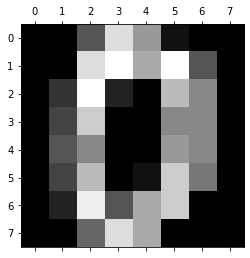

In [12]:
#Посмотрим первую картинку
import matplotlib.pyplot as plt
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [13]:
from sklearn.decomposition import PCA

In [14]:
#Создаем PCA, указываем все 64 компонента
pca = PCA(n_components = 64)

In [15]:
pca.fit(X)

PCA(n_components=64)

In [16]:
pca.components_ #Сами коэффициенты, чтобы перейти от исходного пространства в сжатое

array([[-1.77484909e-19, -1.73094651e-02, -2.23428835e-01, ...,
        -8.94184677e-02, -3.65977111e-02, -1.14684954e-02],
       [ 3.27805401e-18, -1.01064569e-02, -4.90849204e-02, ...,
         1.76697117e-01,  1.94547053e-02, -6.69693895e-03],
       [-1.68358559e-18,  1.83420720e-02,  1.26475543e-01, ...,
         2.32084163e-01,  1.67026563e-01,  3.48043832e-02],
       ...,
       [ 0.00000000e+00, -1.99935421e-16,  3.59878887e-17, ...,
         3.12463083e-19,  5.61110001e-17, -1.02680128e-16],
       [ 0.00000000e+00, -9.98447393e-17,  6.88564743e-17, ...,
         1.02696007e-16, -6.23812393e-17,  1.02996037e-16],
       [ 1.00000000e+00, -1.68983002e-17,  5.73338351e-18, ...,
         8.66631300e-18, -1.57615962e-17,  4.07058917e-18]])

In [17]:
#доля объясненной дисперсии
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

Text(0, 0.5, 'Общая объясненная дисперсия')

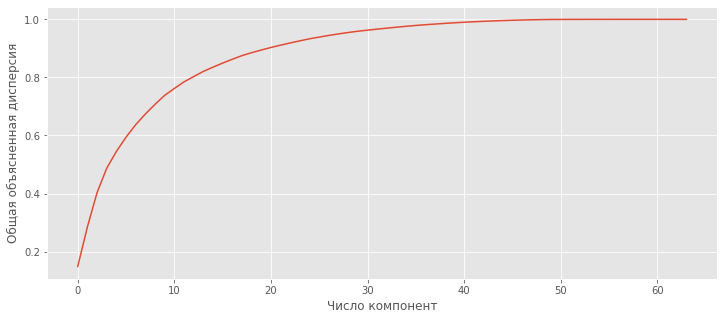

In [18]:
#Нарисуем график доли объясненной дисперсии
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Число компонент')
plt.ylabel('Общая объясненная дисперсия')

In [19]:
#Получается, что около 20 признаков дают 0,9 дисперсии исходных данных, т.е. достаточно взять 20 компонент
#, чтобы снизить размерность без значительной потери данных

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
#посмотрим, как влияет кол-во компонент
k = range(1,64)
scores = []
for n in k: 
    pca = PCA(n_components=n)
    X_pred = pca.inverse_transform(pca.fit_transform(X))
    scores.append(mean_squared_error(X, X_pred))

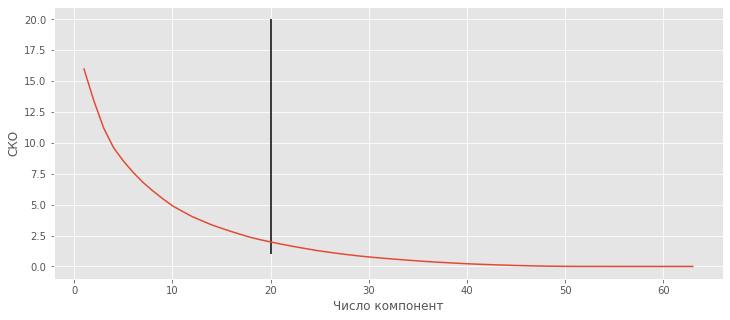

In [22]:
# и это нарисуем
plt.plot(k,scores)
plt.xlabel('Число компонент')
plt.ylabel('СКО')
plt.vlines(20,1,20) #20 - наше число компонент, которое выбрали по доле объясненной дисперсии

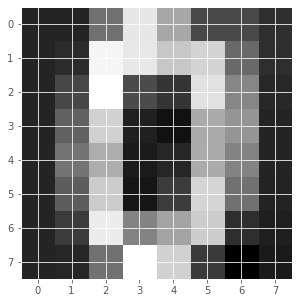

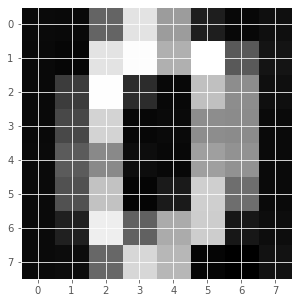

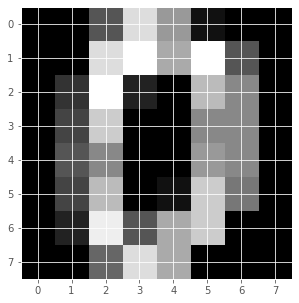

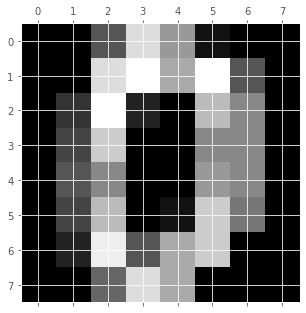

In [23]:
# Из графика видим, что как раз на 20 компоненте СКО снижается приблизительно в 10 раз по сравнению с PCA,
#построенной на 1 компоненте, а на 40 компоненте - СКО практически равен 0. 
#Посмотрим на изображение с 20 и 40 компонентой и сравним с полным разложением по 64-м компонентам и с исходным изображением
import pylab as pl
plt.rcParams['figure.figsize'] = (5,5)
for n in (20,40,64):
    pca = PCA(n_components = n)
    X1 = pca.inverse_transform(pca.fit_transform(X))
    image = X1[0]
    image = image.reshape((8, 8))
    pl.imshow(image, cmap='gray')
    pl.show()
    
image = X[0] #Исходное изображение
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')
plt.show()

In [ ]:
#Из рисунков видно, что на 20-ой компоненте уже распознается изображение, на 40-вой практически неотличимо от исходного.